# Metody eksploracji danych - laboratorium 2 zadanie 2

In [83]:
# Import libraries
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ładowanie danych

In [84]:
base_path = Path('data')
data_path = base_path / 'med_lab_2_zad_2.csv'
HEADERS = ['wiek', 'staz', 'prawdopodobienstwo_znalezienia_pracy']

In [85]:
df = pd.read_csv(data_path, sep=';')
df = df[HEADERS]

## Sprawdzenie danych

In [86]:
df.head()

,wiek,staz,prawdopodobienstwo_znalezienia_pracy
0,19-22,1,0.100000
1,23-26,3,0.106667
2,27-30,5,0.122222
3,31-34,6,0.162500
4,35-38,9,0.180000


In [87]:
df.describe()

,staz,prawdopodobienstwo_znalezienia_pracy
count,10.00000,10.000000
mean,14.40000,0.185889
std,10.62701,0.098690
min,1.00000,0.032500
25%,5.25000,0.110556
50%,14.50000,0.171250
75%,23.75000,0.268750
max,28.00000,0.330000


## Rysoawnie wykresów

<Axes: xlabel='wiek', ylabel='prawdopodobienstwo_znalezienia_pracy'>

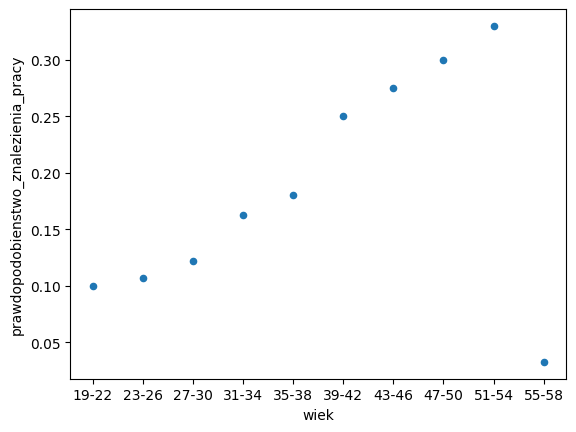

In [26]:
df.plot.scatter(x='wiek', y='prawdopodobienstwo_znalezienia_pracy')

<Axes: xlabel='staz', ylabel='prawdopodobienstwo_znalezienia_pracy'>

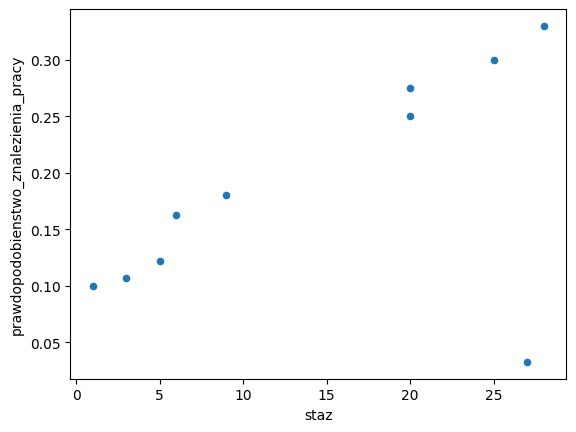

In [27]:
df.plot.scatter(x='staz', y='prawdopodobienstwo_znalezienia_pracy')

<Axes: xlabel='wiek', ylabel='staz'>

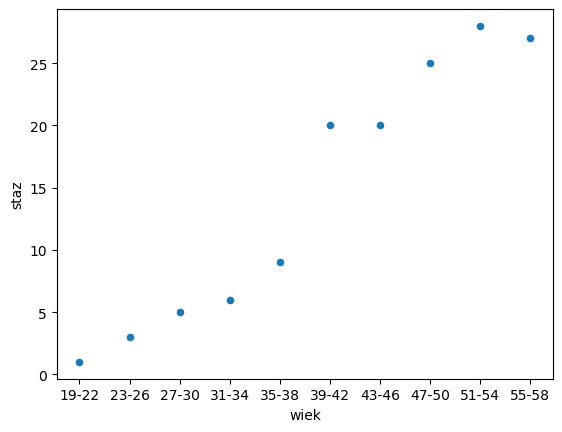

In [28]:
df.plot.scatter(x='wiek', y='staz')

## Przygotowanie danych

### Zmiana wieku z przedziału na wartość środkową

In [88]:
# Change wiek column from range to mean
def wiek_to_mean(x):
    x = x.split('-')
    return (int(x[0]) + int(x[1])) / 2

In [89]:
df['wiek'] = df['wiek'].apply(wiek_to_mean)

In [90]:
df['wiek']

0    20.5
1    24.5
2    28.5
3    32.5
4    36.5
5    40.5
6    44.5
7    48.5
8    52.5
9    56.5
Name: wiek, dtype: float64

### Korelacja

In [32]:
correlation = df.corr()

<Axes: >

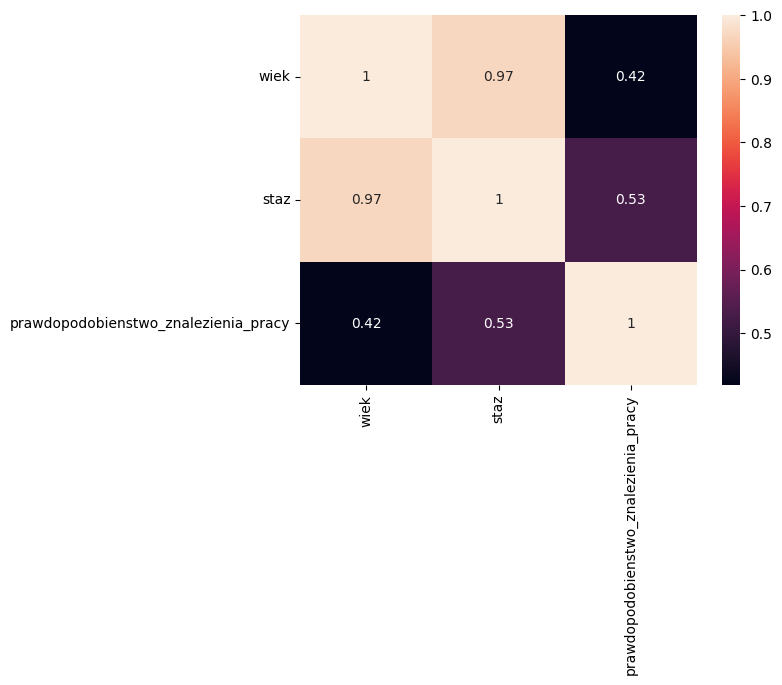

In [33]:
sns.heatmap(correlation, annot=True)

### Podział na zbiór treningowy i testowy

In [91]:
df_train = df.sample(frac=0.8, random_state=0)
df_test = df.drop(df_train.index)

## Trenowanie modelu

### Trenowamie regresji liniowej

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
X_train = df_train[['wiek', 'staz']]
y_train = df_train['prawdopodobienstwo_znalezienia_pracy']
X_test = df_test[['wiek', 'staz']]
y_test = df_test['prawdopodobienstwo_znalezienia_pracy']

In [95]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

## Testowanie modelu

In [38]:
y_pred = linear_regression.predict(X_test)

In [39]:
print('y_pred: ', y_pred)
print('y_test: ', y_test.values)
print(df_test)

y_pred:  [0.2264529  0.31685937]
y_test:  [0.1  0.25]
   wiek  staz  prawdopodobienstwo_znalezienia_pracy
0  20.5     1                                  0.10
5  40.5    20                                  0.25


In [40]:
from sklearn.metrics import mean_squared_error

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 0.01


### Równanie regresji liniowej

In [41]:
print(f'Linear regression equation: {linear_regression.coef_[0]} * wiek + {linear_regression.coef_[1]} * staz + {linear_regression.intercept_}')

Linear regression equation: -0.021822561351673483 * wiek + 0.02772935229159643 * staz + 0.6460860543844809


### Wykres regresji liniowej

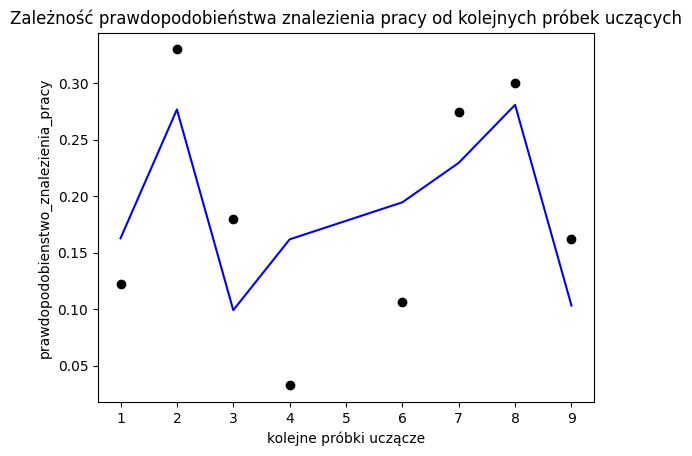

In [107]:
plt.plot(sorted(X_train.index), linear_regression.predict(X_train), color='blue')
plt.scatter(sorted(X_train.index), y_train, color='black')
plt.xlabel('kolejne próbki uczącze')
plt.ylabel('prawdopodobienstwo_znalezienia_pracy')
plt.title('Zależność prawdopodobieństwa znalezienia pracy od kolejnych próbek uczących')
plt.show()

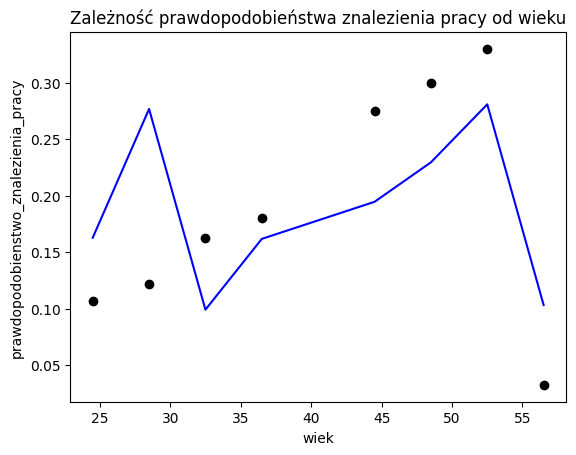

In [104]:
plt.plot(X_train['wiek'].sort_index(), linear_regression.predict(X_train), color='blue')
plt.scatter(X_train['wiek'], y_train, color='black')
plt.xlabel('wiek')
plt.ylabel('prawdopodobienstwo_znalezienia_pracy')
plt.title('Zależność prawdopodobieństwa znalezienia pracy od wieku')
plt.show()

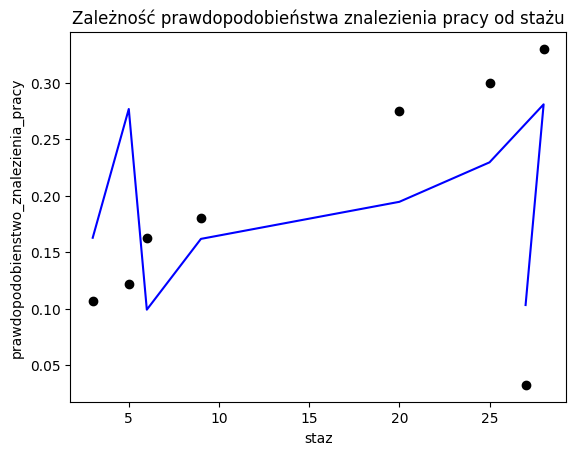

In [105]:
plt.plot(X_train['staz'].sort_index(), linear_regression.predict(X_train), color='blue')
plt.scatter(X_train['staz'], y_train, color='black')
plt.xlabel('staz')
plt.ylabel('prawdopodobienstwo_znalezienia_pracy')
plt.title('Zależność prawdopodobieństwa znalezienia pracy od stażu')
plt.show()

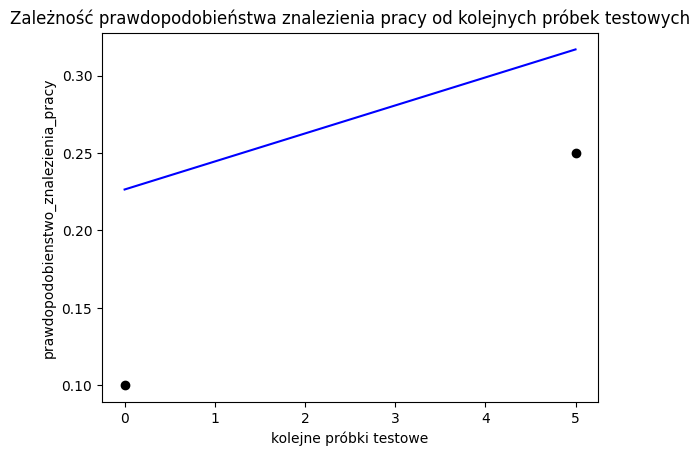

In [106]:
plt.plot(sorted(X_test.index), linear_regression.predict(X_test), color='blue')
plt.scatter(sorted(X_test.index), y_test, color='black')
plt.xlabel('kolejne próbki testowe')
plt.ylabel('prawdopodobienstwo_znalezienia_pracy')
plt.title('Zależność prawdopodobieństwa znalezienia pracy od kolejnych próbek testowych')
plt.show()

### Regresja logistyczna

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
df_train['prawdopodobienstwo_znalezienia_pracy'] = df_train['prawdopodobienstwo_znalezienia_pracy'].apply(lambda x: int(x*100))

In [45]:
X_train = df_train[['wiek', 'staz']]
y_train = df_train['prawdopodobienstwo_znalezienia_pracy']
X_test = df_test[['wiek', 'staz']]
y_test = df_test['prawdopodobienstwo_znalezienia_pracy']

In [46]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/root/repo/med_lab/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Testowanie regresji logistycznej

In [47]:
y_pred = [x/100 for x in logistic_regression.predict(X_test)]

In [48]:
print('y_pred: ', y_pred)
print('y_test: ', y_test.values)
print(df_test)

y_pred:  [0.1, 0.3]
y_test:  [0.1  0.25]
   wiek  staz  prawdopodobienstwo_znalezienia_pracy
0  20.5     1                                  0.10
5  40.5    20                                  0.25


In [49]:
from sklearn.metrics import mean_squared_error

print('Mean squared error: %.4f' % mean_squared_error(y_test, y_pred))

Mean squared error: 0.0012


### Równanie regresji logistycznej

In [50]:
print(f'Logistic regression equation: {logistic_regression.coef_[0]} * wiek + {logistic_regression.coef_[1]} * staz + {logistic_regression.intercept_}')

Logistic regression equation: [0.0345248  0.56392792] * wiek + [-0.08838637 -0.91500823] * staz + [-11.67963649  10.46077092   5.73598689  -3.1826592   -5.3467165
   3.59118672   3.13595152  -2.71488385]


## Wnioski

Poza jednym outlayerem (numer grupy: 10) dane są dość dobrze dopasowane do prostej. Zarówno wiek i średni staz zwiększają prawdopodobieństwo znalezienie pracy.